# Obtaining a list of equities tickers and the corresponding timeseries

In [1]:
! pip install --quiet yfinance ##--quiet mutes the package list as it’s installing

In [2]:
import os
import json
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly
import yfinance as yf
import pandas_datareader.data as web; yf.pdr_override()

In [3]:
start_date = '2023-03-01'
end_date  = '2023-03-31'

data_dir = '/data/'

## Get list of companies in S&P500

We will obtain and store the list of the constituents from Wikipedia.

In [4]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table   = data[0]
#print (table)
symbols = list(table.Symbol.values) ##companies

print("{} symbols in total".format(len(symbols)))


503 symbols in total


## Download price timeseries

Now that we have a list of ticker symbols, we can download the corresponding timeseries from Yahoo Finance.

In [5]:
symbols.append('SPY')

In [6]:
dates = '_{}--{}'.format(start_date, end_date)
dates

'_2023-03-01--2023-03-31'

In [7]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''
os.mkdir(data_dir)

In [8]:
#!ls /data

In [9]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-01 -> 2023-03-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1677646800, endDate = 1680235200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [10]:
# Printing a sample dataframe
idx = np.random.randint(len(symbols))
print("History for {}".format(symbols[idx]))
df = pd.read_csv(os.path.join(data_dir, symbols[idx]+".csv")).set_index('Date')
df.head()

History for HUM


,Adj Close,Volume
Date,,
2023-03-01,494.260712,507900
2023-03-02,493.872253,815100
2023-03-03,498.305267,842600
2023-03-06,497.169617,819500
2023-03-07,494.151154,647300


## Pre-process Financial Timeseries

In [12]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes
df_volume = pd.DataFrame(index=index, columns=symbols)

In [13]:
# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']
    df_volume[symbol] = symbol_df['Volume']

### Removing NaNs

In [14]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_volume.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)
df_volume.dropna(inplace=True, axis=1)
assert((df_price.index == df_volume.index).all())

In [15]:
True in pd.isna(df_price)

False

### Storing the cleaned dataframes

In [16]:
df_volume.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-01,3132800.0,11730500.0,55479000.0,5485800.0,3963500.0,2655900.0,1700500.0,2377700.0,2600300.0,2987600.0,...,3367800.0,3197400.0,13200000.0,2789400.0,1331400.0,1635100.0,848800.0,409000.0,1128600.0,1594200.0
2023-03-02,1879200.0,11728300.0,52238100.0,4567800.0,5209900.0,1766600.0,2278300.0,3845800.0,2906400.0,2772500.0,...,3973800.0,2443200.0,10339900.0,2101500.0,1622700.0,1212600.0,1531500.0,254200.0,1528900.0,1606700.0
2023-03-03,1147800.0,14389500.0,70732300.0,4851200.0,4982400.0,3066300.0,1596100.0,3725500.0,3112400.0,1866800.0,...,2577600.0,2790100.0,13006700.0,1853500.0,1192800.0,1015500.0,1726300.0,230200.0,1499200.0,1663200.0
2023-03-06,1153600.0,13504800.0,87558000.0,4051900.0,5005100.0,3749900.0,1649100.0,3060300.0,2664100.0,2764500.0,...,2342000.0,2328200.0,14347400.0,4662500.0,933800.0,1421500.0,1022800.0,154900.0,1644600.0,1489500.0
2023-03-07,1088400.0,17951300.0,56182000.0,4606900.0,6349000.0,3132000.0,2219300.0,2252800.0,2415100.0,2400800.0,...,2104700.0,3223400.0,11525300.0,2229400.0,1472900.0,1157300.0,1322600.0,182600.0,2200200.0,1287600.0


In [17]:
#so instead of 500 csv files its now two
df_price.to_csv(os.path.join(data_dir, "prices.csv"), index_label='date')
df_volume.to_csv(os.path.join(data_dir, "volume.csv"))

#finds percent change between current price and prior
df_price_pct = df_price.pct_change()[1:]
df_price_pct.to_csv(os.path.join(data_dir, "prices_pct.csv"), index_label='date')
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-02,0.030252,0.005614,0.004129,-0.005732,0.017852,-0.000986,0.006336,0.031294,0.008083,0.016784,...,0.010604,0.016912,0.004599,0.008565,0.011475,0.019651,0.007454,0.012304,-0.042228,0.006027
2023-03-03,0.015953,0.014888,0.035090,0.010882,0.017734,0.005642,0.014853,0.031604,0.008993,0.006082,...,0.021338,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,-0.016276,0.005610,0.001597,0.008662,-0.003919,0.004194,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014496,-0.015134,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,-0.020516,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.005801,-0.009861,-0.002044,0.003016,0.008814,0.002258,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639


In [ ]:
df_price.pct_change()[1:].to_csv(os.path.join(data_dir, 'prices_pct'+dates+'.csv'), index_label='date')
df_price.to_csv(os.path.join(data_dir, 'prices'+dates+'.csv'), index_label='date')

## Obtain Percentage Change and Correlation

We need to convert prices to percent change in price as opposed to the actual \$ price. This is because stocks with very similar prices can behave very differently and vice-versa.
For e.g., if a stock moves from \$100 to \$110, we want the price column to say 10% (indicating the change).

However, for volume, we will retain magnitude.

Spearman correlation

In [ ]:
df_price_pct = df_price.pct_change().dropna(how='all')
df_volume_pct = df_volume.pct_change().dropna(how='all')

### Calculate Correlations

In [ ]:
price_corr = df_price_pct.corr()
volume_corr = df_volume.corr()

In [ ]:
price_corr.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.634246,0.608214,0.281894,0.795024,0.754294,0.403667,0.643184,0.554535,0.797062,...,0.719931,0.308945,0.688509,0.683572,0.806952,0.708482,0.622098,0.718135,0.357758,0.711038
AAL,0.634246,1.000000,0.348835,0.020831,0.377535,0.668225,0.444541,0.601988,0.519899,0.452781,...,0.741228,-0.138332,0.668906,0.465695,0.627330,0.155348,0.283691,0.674735,0.642878,0.386871
AAPL,0.608214,0.348835,1.000000,0.430718,0.682303,0.514236,0.499006,0.681890,0.650519,0.478374,...,0.661787,0.433742,0.363924,0.644338,0.550325,0.562940,0.476473,0.618441,0.252991,0.572950
ABBV,0.281894,0.020831,0.430718,1.000000,0.555868,0.332321,0.333260,0.347618,0.208738,0.359141,...,0.389479,0.323912,0.262832,0.660758,0.372889,0.391199,0.690441,0.205876,0.089707,0.330131
ABT,0.795024,0.377535,0.682303,0.555868,1.000000,0.513236,0.512720,0.568679,0.560640,0.614132,...,0.617615,0.514684,0.437015,0.654384,0.671476,0.745978,0.669481,0.623132,0.178525,0.631607


Text(0.5, 1.0, 'Correlation heatmap for Volume')

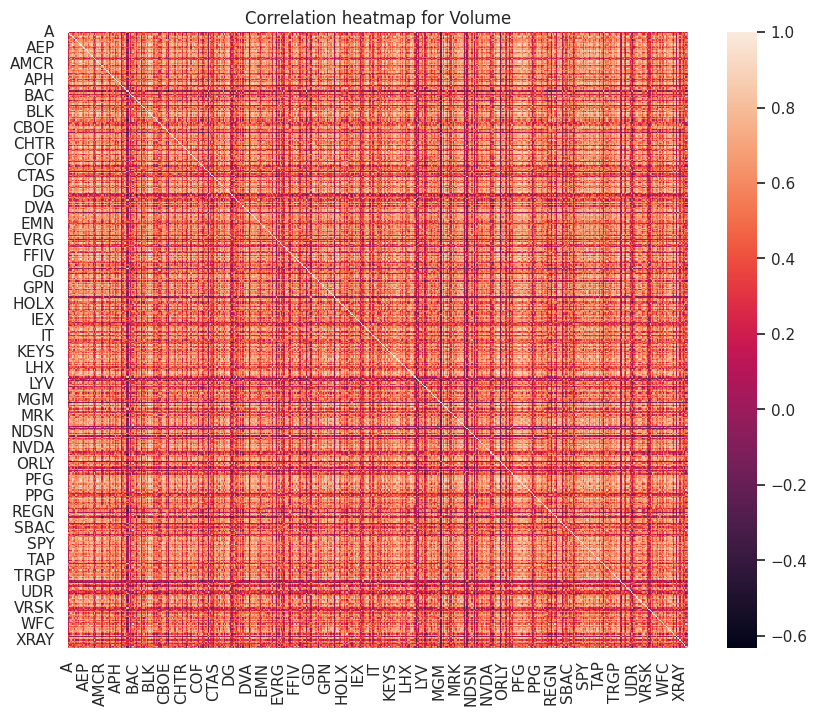

In [ ]:
sns.heatmap(volume_corr).set_title("Correlation heatmap for Volume")

Text(0.5, 1.0, 'Correlation heatmap for Price Changes')

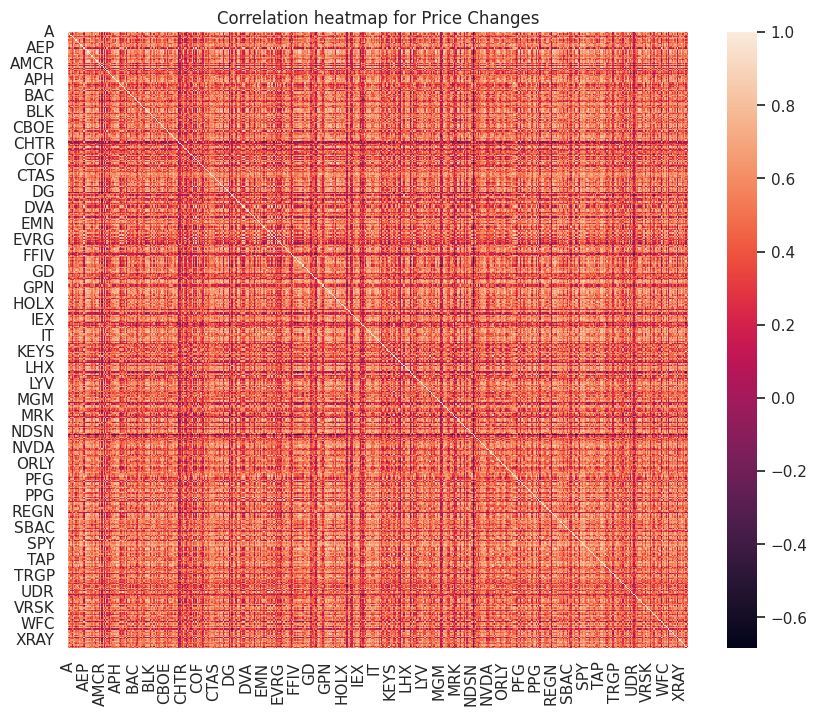

In [ ]:
sns.heatmap(price_corr).set_title("Correlation heatmap for Price Changes")

### Examining correlations further
As we can see above, the price histories of JP Morgan (JPM) and Goldman Sachs (GS) are highly correlated. This makes sense as they are both financial sector stocks.

This can be observed in the plots below.

In [ ]:
df_price_pct['JPM'].head()

2023-03-02   -0.010382
2023-03-03    0.018360
2023-03-06   -0.005847
2023-03-07   -0.029408
2023-03-08   -0.005915
Name: JPM, dtype: float64

Text(0.5, 1.0, 'Price Change Scatterplot between JPM and GS. Correlation = 0.6524117021452818')

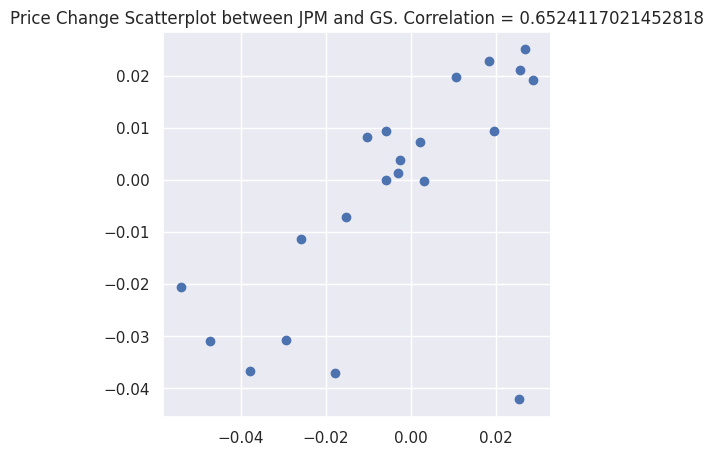

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_price_pct['JPM'], df_price_pct['GS'])
plt.title('Price Change Scatterplot between JPM and GS. Correlation = {}'.format(price_corr['JPM']['GS']))

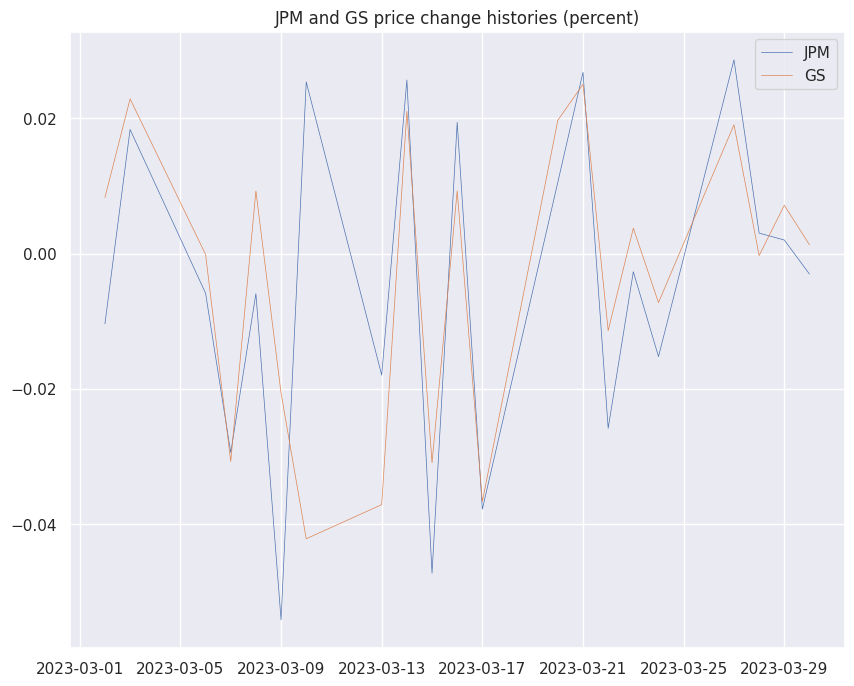

In [ ]:
plt.title('JPM and GS price change histories (percent)')
plt.plot(df_price_pct['JPM'], label='JPM', linewidth=0.5)
plt.plot(df_price_pct['GS'], label='GS', linewidth=0.5)
plt.legend()

## Impact of SVB Collapse on S&P
I wanted to show how the collapse of the SVB impacted the S&P index, particularly show how it affected other banks vs unrelated sectors

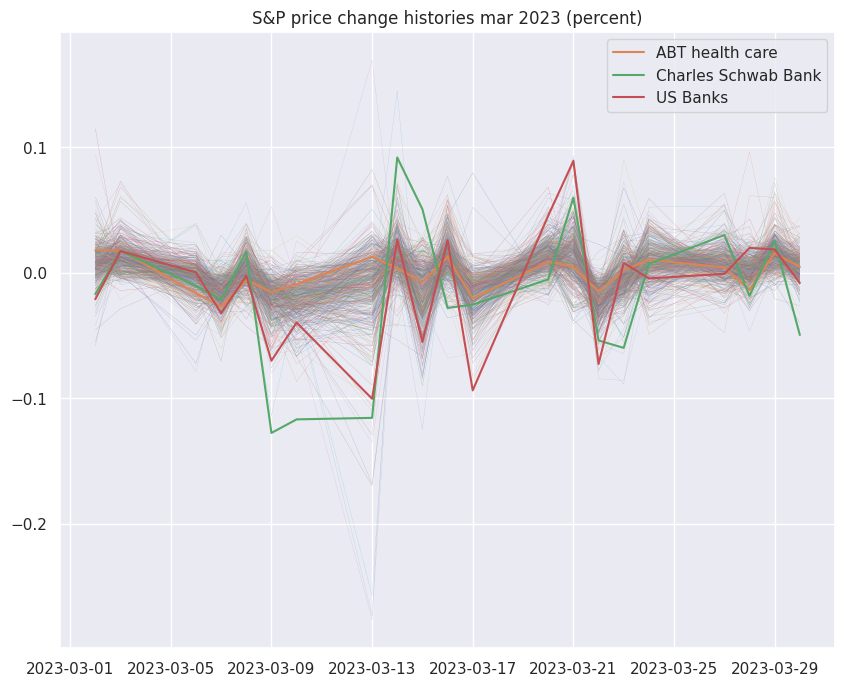

In [ ]:
plt.title('S&P price change histories mar 2023 (percent)')
plt.plot(df_price_pct, linewidth=0.10)
plt.plot(df_price_pct['ABT'], label='ABT health care', linewidth=1.5)
plt.plot(df_price_pct['SCHW'], label = 'Charles Schwab Bank', linewidth=1.5)
plt.legend()

Summary statistics for the df_price and df_volume dataframes and then boxplots to find outliers

In [ ]:
df_price_summary_stats = df_price.describe()
df_price_summary_stats['averageeee'] = df_price_summary_stats.mean(axis=1)
df_price_summary_stats.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,averageeee
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,136.052220,14.846818,154.091674,151.526662,97.985761,67.491364,260.743782,352.694088,184.228574,77.233811,...,64.502599,105.296111,37.346609,99.041763,126.402486,124.536886,295.538634,35.084094,164.729070,169.228362
std,3.694450,1.041356,4.756257,2.873021,2.028990,2.584004,10.447680,19.004205,2.775107,1.837052,...,1.508815,3.890755,0.715118,2.425382,1.361172,1.711085,8.011394,8.100393,2.634041,5.050105
min,130.667206,13.630000,144.913605,144.405930,95.918327,62.740002,244.320389,323.380005,180.037750,73.429565,...,62.199970,98.176308,36.116772,94.109299,123.423141,121.475807,284.920013,26.666775,160.541397,161.144557
25%,133.287922,13.965000,150.760109,150.643757,96.861574,65.915003,251.027111,334.799988,182.105476,75.980707,...,63.316657,102.065401,36.851416,97.072252,125.620050,123.269392,288.735008,29.151300,163.005665,165.526716


In [11]:
df_volume_summary_stats = df_volume.describe()
df_volume_summary_stats['averageeee'] = df_volume_summary_stats.mean(axis=1)
df_volume_summary_stats['averageeee'].head()

NameError: ignored

## Saving correlation dataframes

In [ ]:
#df_price_pct.to_csv(os.path.join(data_dir, 'price_pct.csv'), index_label='date')
price_corr.to_csv(os.path.join(data_dir, 'price_corr.csv'), index_label='Symbol')
volume_corr.to_csv(os.path.join(data_dir, 'volume_corr.csv'))

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.634246,0.608214,0.281894,0.795024,0.754294,0.403667,0.643184,0.554535,0.797062,...,0.719931,0.308945,0.688509,0.683572,0.806952,0.708482,0.622098,0.718135,0.357758,0.711038
AAL,0.634246,1.000000,0.348835,0.020831,0.377535,0.668225,0.444541,0.601988,0.519899,0.452781,...,0.741228,-0.138332,0.668906,0.465695,0.627330,0.155348,0.283691,0.674735,0.642878,0.386871
AAPL,0.608214,0.348835,1.000000,0.430718,0.682303,0.514236,0.499006,0.681890,0.650519,0.478374,...,0.661787,0.433742,0.363924,0.644338,0.550325,0.562940,0.476473,0.618441,0.252991,0.572950
ABBV,0.281894,0.020831,0.430718,1.000000,0.555868,0.332321,0.333260,0.347618,0.208738,0.359141,...,0.389479,0.323912,0.262832,0.660758,0.372889,0.391199,0.690441,0.205876,0.089707,0.330131
ABT,0.795024,0.377535,0.682303,0.555868,1.000000,0.513236,0.512720,0.568679,0.560640,0.614132,...,0.617615,0.514684,0.437015,0.654384,0.671476,0.745978,0.669481,0.623132,0.178525,0.631607
